In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from helpr.physics.api import CrackEvolutionAnalysis
from helpr.utilities.unit_conversion import convert_psi_to_mpa, convert_in_to_m
from helpr.utilities.plots import plot_sensitivity_results
from probabilistic.capabilities.uncertainty_definitions import UniformDistribution, NormalDistribution, DeterministicCharacterization

In [3]:
# # turn warnings back on for general use
# import warnings
# warnings.filterwarnings('ignore')

## **Sensitivity Analysis of Pipeline Lifetime Evaluation**

####  **Problem Specification**

- **Geometry**


In [4]:
pipe_outer_diameter = DeterministicCharacterization(name='outer_diameter',
                                                    value=convert_in_to_m(36))  # pipe outer diameter, m
wall_thickness = DeterministicCharacterization(name='wall_thickness',
                                               value=convert_in_to_m(0.406))  # pipe wall thickness, m

- **Material Properties**

In [5]:
yield_strength = DeterministicCharacterization(name='yield_strength',
                                               value=convert_psi_to_mpa(52_000))  # material yield strength, MPa
fracture_resistance = DeterministicCharacterization(name='fracture_resistance',
                                                    value=55)  # fracture resistance (toughness), MPa m1/2

- **Operating Conditions**

In [6]:
max_pressure = NormalDistribution(name='max_pressure',
                                  uncertainty_type='aleatory',
                                  nominal_value=convert_psi_to_mpa(840),
                                  mean=convert_psi_to_mpa(850),
                                  std_deviation=convert_psi_to_mpa(20))  # maximum pressure during oscillation, MPa
min_pressure = NormalDistribution(name='min_pressure',
                                  uncertainty_type='aleatory',
                                  nominal_value=convert_psi_to_mpa(638),
                                  mean=convert_psi_to_mpa(638),
                                  std_deviation=convert_psi_to_mpa(20))  # minimum pressure during oscillation, MPa
temperature = UniformDistribution(name='temperature',
                                  uncertainty_type='aleatory',
                                  nominal_value=293,
                                  upper_bound=300,
                                  lower_bound=285)  # gas blend temperature variation, K
volume_fraction_h2 = UniformDistribution(name='volume_fraction_h2',
                                        uncertainty_type='aleatory',
                                        nominal_value=0.1,
                                        upper_bound=0.2,
                                        lower_bound=0)  # % volume fraction H2 in natural gas blend, fraction

- **Initial Crack Dimensions**

In [7]:
flaw_depth = UniformDistribution(name='flaw_depth',
                                uncertainty_type='aleatory',
                                nominal_value=25,
                                upper_bound=30,
                                lower_bound=20) # population of flaw % through pipe thickness, %
flaw_length = DeterministicCharacterization(name='flaw_length',
                                            value=0.04) # length of initial crack/flaw, m

- **Quantities of Interest** *(QoI)*

In [8]:
plotted_variable = 'Cycles to a(crit)'             

- **Probabilistic Settings**

In [9]:
sample_type = 'bounding'

####  **Analysis**
- **Performing basic bounding sensitivity study on uncertain variables**

In [10]:
analysis = CrackEvolutionAnalysis(outer_diameter=pipe_outer_diameter,
                                  wall_thickness=wall_thickness,
                                  flaw_depth=flaw_depth,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_length=flaw_length,
                                  sample_type=sample_type)
analysis.perform_study()

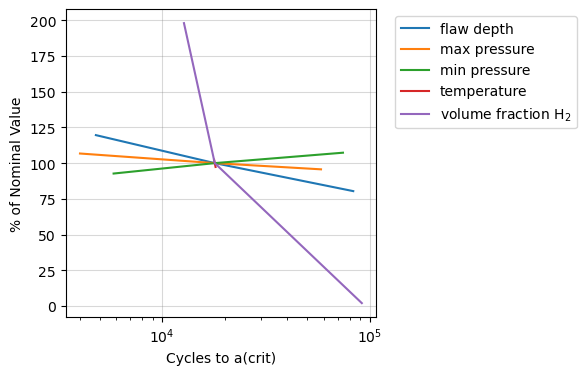

In [11]:
plot_sensitivity_results(analysis)
plt.savefig('./Figures/sensitivity_bounding.png', format='png', dpi=300, bbox_inches='tight')

- **Probabilistic Settings**

In [12]:
sample_type = 'sensitivity'
sample_size = 100

- **Performing sensitivity study on uncertain variables**

In [13]:
analysis = CrackEvolutionAnalysis(outer_diameter=pipe_outer_diameter,
                                  wall_thickness=wall_thickness,
                                  flaw_depth=flaw_depth,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_length=flaw_length,
                                  aleatory_samples=sample_size,
                                  sample_type=sample_type)
analysis.perform_study()

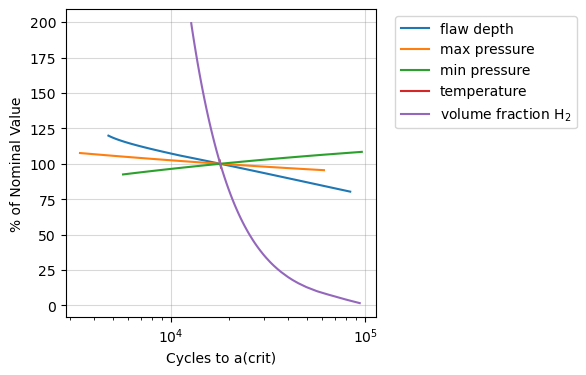

In [14]:
plot_sensitivity_results(analysis)
plt.savefig('./Figures/sensitivity_study.png', format='png', dpi=300, bbox_inches='tight')

In [16]:
analysis.save_results()

'Results/date_16_04_2024_time_13_14/'